In [1]:
import numpy as np
import sys
import os
sys.path.append(os.path.join(os.getcwd(),"../Algorithm encapsulation"))
sys.path.append(os.path.join(os.getcwd(),".."))
print(sys.path) 
from LMband import LMband
import pandas as pd
from ga_platoon import max_dt

['f:\\workspace\\jupyter\\论文\\graduation thesis\\Case Analysis', 'd:\\anaconda\\envs\\cplex\\python37.zip', 'd:\\anaconda\\envs\\cplex\\DLLs', 'd:\\anaconda\\envs\\cplex\\lib', 'd:\\anaconda\\envs\\cplex', '', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\chardet-3.0.4-py3.7.egg', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\docloud-1.0.375-py3.7.egg', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\urllib3-1.25.11-py3.7.egg', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\fonttools-4.36.0-py3.7.egg', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\cvxopt-1.3.0-py3.7-win-amd64.egg', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\pytz-2022.2.1-py3.7.egg', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\win32', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\win32\\lib', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\Pythonwin', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\0\\.ipython', 'f:\\wor

In [2]:
def get_rf(d,p):
    tmp=[]
    for i,a in enumerate(p):
        idx=np.where(a!=0)[0]
        a=a&0
        if len(idx)>0:
            a[:idx[0]]=1
        tmp.append((d[i]*a).sum())
    return tmp

In [3]:
phase = np.loadtxt("./data/phase")
cir=phase[0].sum()
phase=phase/cir
vol = np.loadtxt("./data/volume")
qv = np.loadtxt("./data/path_vol")
phase_get = np.load("./data/phase_get.npy")
d = np.loadtxt("./data/distance")
straight_get = np.load("./data/straight_get.npy")
ison = np.array([0, 0, 0, 1, 1, 1])
px = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
pxb = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
qb=[120,120]
lower, upper = 8, 14
linspace = np.arange(lower, upper, 1)
lin_num = len(linspace)

# 南北直行方向绿灯时间
sg=np.array([(straight_get[i]*phase).sum(axis=1) for i in range(len(straight_get))])
rho = vol[0] / vol[1]
num = len(vol[0])
numr = len(qv)
nump = len(phase_get)
M = 1e6
nx = 0.00000001
be = 8
speedScope = np.array([lower, upper])
speedVar = np.array([-2, 2])

g=np.array([(phase_get[i]*phase).sum(axis=1) for i in range(numr) ])
r=1-g
rf=np.array([get_rf(phase,phase_get[i]) for i in range(numr)])

ex=[1,0,1,0,1,0,1,1,1,1,1,0]
dwt=15
qb_x=np.ones_like(sg)*20
cap=np.ones_like(sg,dtype=int)*3

spd_on=pd.read_csv(os.path.join(os.getcwd(),"..","speed analysis","上行速度数据.csv"),index_col=0)
spd_in=pd.read_csv(os.path.join(os.getcwd(),"..","speed analysis","下行速度数据.csv"),index_col=0)

In [4]:
lmb=LMband(phase, [80,180], vol, qv, phase_get, d, straight_get,ison, px, pxb, qb,qb_x,cap, lower, upper, 
           linspace, be, speedVar[0], speedVar[1],ex, dwt,lower,upper,speedVar[0], speedVar[1],spd_on,spd_in)
lmb._M1_solve()


Version identifier: 12.10.0.0 | 2019-11-26 | 843d4de2ae
CPXPARAM_Read_DataCheck                          1
CPXPARAM_RandomSeed                              201903125
Tried aggregator 2 times.
MIP Presolve eliminated 335 rows and 104 columns.
MIP Presolve modified 996 coefficients.
Aggregator did 52 substitutions.
Reduced MIP has 949 rows, 449 columns, and 3116 nonzeros.
Reduced MIP has 68 binaries, 76 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (3.24 ticks)
Probing fixed 0 vars, tightened 51 bounds.
Probing time = 0.00 sec. (0.32 ticks)
Tried aggregator 1 time.
Detecting symmetries...
MIP Presolve modified 244 coefficients.
Reduced MIP has 949 rows, 449 columns, and 3116 nonzeros.
Reduced MIP has 68 binaries, 76 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (1.69 ticks)
Probing time = 0.00 sec. (0.30 ticks)
Clique table members: 29.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using 

In [5]:
lmb._M2_solve()

M1 3032.2355452400957 977.2800000000001
M1 3032.2355452400957 977.2800000000001
M1 3032.2355452400957 977.2800000000001
M1 3032.2355452400957 977.2800000000001
M1 3032.2355452400957 977.2800000000001
M1 3032.2355452400957 977.2800000000001
M1 3032.2355452400957 977.2800000000001
M1 3032.2355452400957 977.2800000000001
M1 3032.2355452400957 977.2800000000001
[[array([0.0199, 0.0795, 0.1561, 0.151 , 0.072 , 0.0169]), array([0.0003, 0.0051, 0.0384, 0.1265, 0.1814, 0.1134]), array([0.0102, 0.0288, 0.0603, 0.0939, 0.1086, 0.0934]), array([0.000e+00, 0.000e+00, 0.000e+00, 1.000e-04, 1.557e-01, 2.965e-01]), array([0.    , 0.0004, 0.0036, 0.0201, 0.0655, 0.1258])], [array([0.0107, 0.0586, 0.1469, 0.1691, 0.0894, 0.0217]), array([0.0031, 0.0381, 0.153 , 0.203 , 0.089 , 0.0129]), array([0.    , 0.0004, 0.0119, 0.0952, 0.2188, 0.1447]), array([0.0003, 0.0078, 0.0711, 0.1994, 0.172 , 0.0457]), array([1.000e-04, 2.800e-03, 2.860e-02, 1.177e-01, 1.918e-01, 1.239e-01])]]
M1 3032.2355452400957 977.280

In [6]:
a=lmb.get_dataframe()
a

M1 3032.2355452400957 977.2800000000001


,cross_number,distance,b1,b2,b3,b4,b5,b6,offset,p,...,u3,u4,u5,u6,bb1,bb2,dw1,dw2,tb1,tb2
0,1.0,800.0,24.024751,24.024751,0.000000,23.542771,0.000000,32.373778,0.000000,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,24.024751,32.373778,15.0,15.000000,97.462111,73.437360
1,2.0,520.0,22.150480,22.150480,0.000000,31.351448,0.000000,31.351448,85.194153,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,22.150480,31.351448,15.0,15.000000,54.866828,37.142857
2,3.0,500.0,22.150480,22.150480,0.000000,19.594655,0.000000,19.594655,68.071922,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,22.150480,19.594655,15.0,15.000000,51.185096,54.157475
3,4.0,490.0,21.724509,21.724509,0.000000,19.594655,0.000000,19.594655,34.062864,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,21.724509,19.594655,15.0,15.000000,50.918303,35.000000
4,5.0,370.0,21.724509,21.724509,0.000000,21.724509,0.000000,21.724509,85.194153,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,21.724509,21.724509,15.0,48.150000,41.428571,94.400000
5,6.0,254.0,43.328887,38.336258,43.328887,115.900316,0.000000,115.900316,87.778299,1.0,...,1.000000e-08,1.000279e-08,1.000000e-08,1.000000e-08,43.328887,115.900316,15.0,15.000000,18.142857,18.142857
6,7.0,585.0,43.328887,38.336258,43.328887,43.328887,0.000000,43.328887,105.921156,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,43.328887,43.328887,15.0,32.058178,73.125000,105.183178
7,8.0,1020.0,15.730982,0.000000,15.730982,0.000000,23.834822,0.000000,4.112821,1.0,...,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,15.730982,15.730982,15.0,15.000000,97.695217,92.983357
8,9.0,409.0,10.935265,0.000000,28.411107,0.000000,23.834822,0.000000,0.128689,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,28.411107,15.730982,15.0,15.000000,51.125000,44.214286
9,10.0,547.0,46.407196,0.000000,46.407196,46.407196,46.407196,0.000000,60.867207,1.0,...,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,46.407196,46.407196,15.0,15.000000,68.375000,54.071429


In [7]:
a.b1.mean(),a.b2[:8].mean(),a.b3[4:].mean(),a.b4.mean(),a.b5[7:].mean(),a.b6[:8].mean(),a.bb1.mean(),a.bb2.mean()

(33.34397526475652,
 23.55590567454975,
 37.68586581070444,
 37.172636072854914,
 42.646111705958454,
 35.48353113212605,
 34.68827084779479,
 40.272095427256495)

M1 3032.2355452400957 977.2800000000001


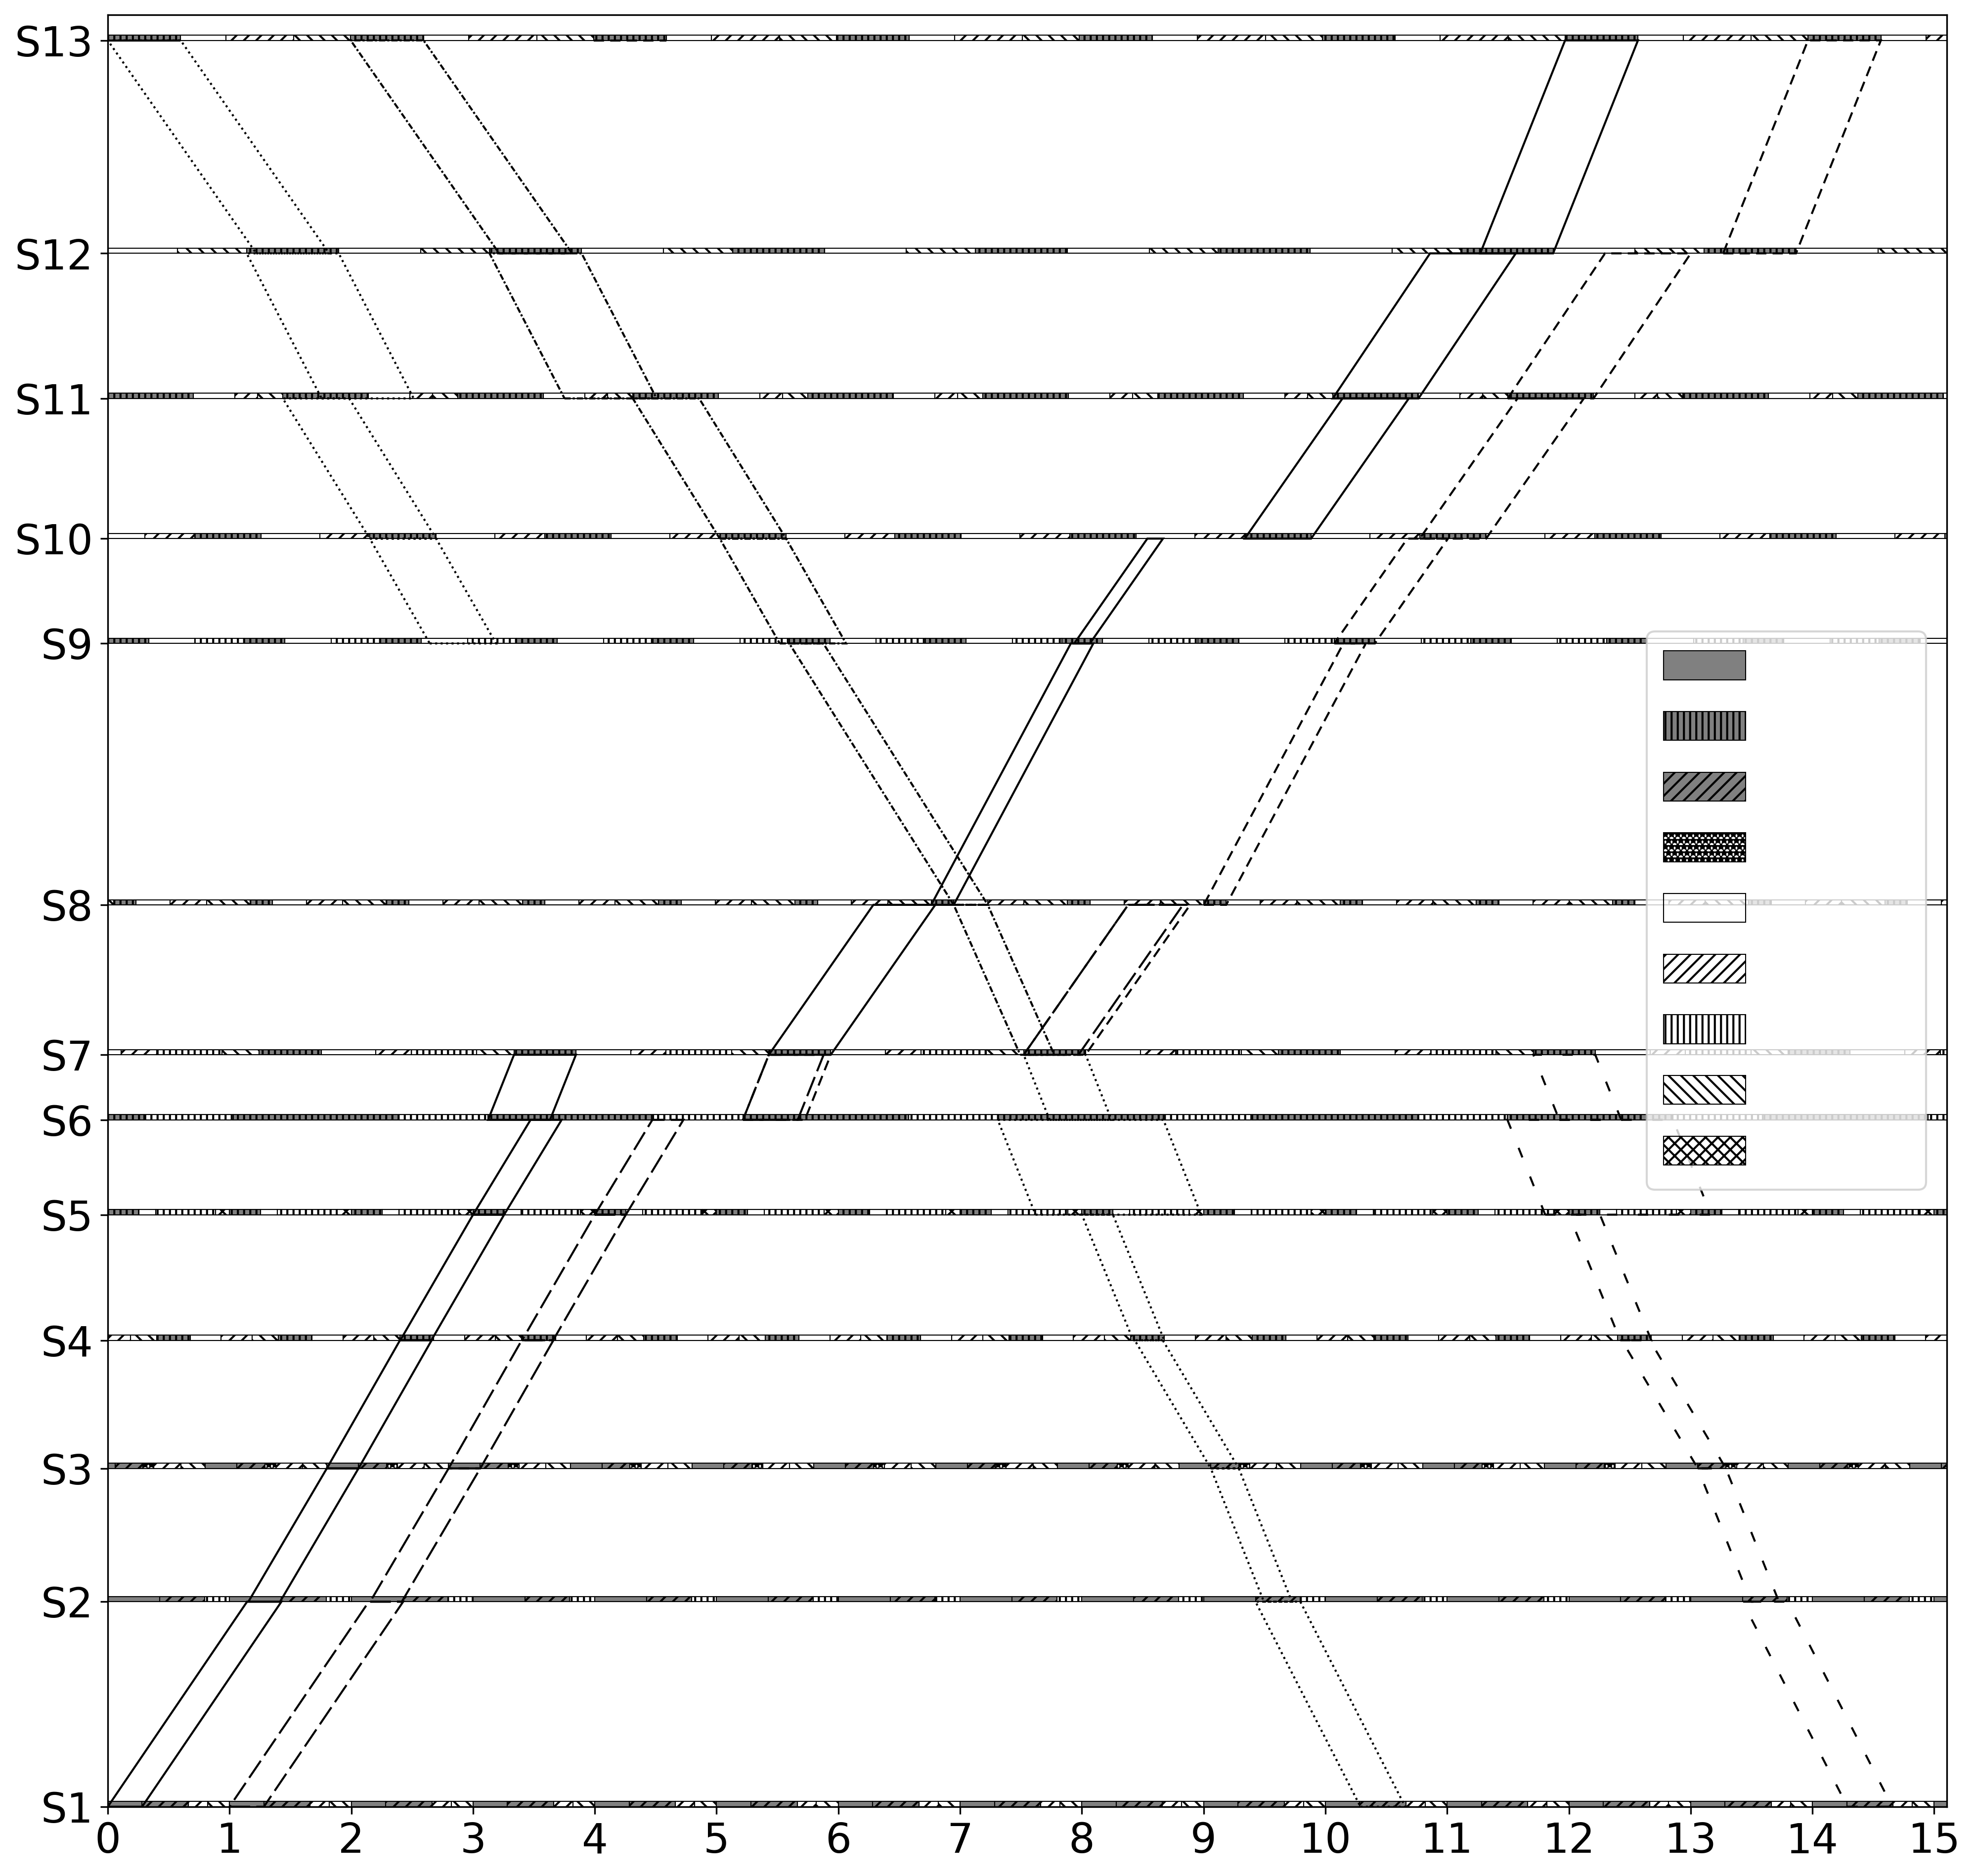

In [8]:
colors=[
            {"color":"gray" , "hatch": None, "fill": True},
            {"color":"gray", "hatch":"||||" , "fill": True},
            {"color": "gray", "hatch":"////" , "fill": True},
            {"color":"white", "hatch": "****", "fill": False},
            {"color": "white", "hatch": None, "fill": False},
            {"color": "white", "hatch": "////", "fill": False},
            {"color": "white", "hatch": "||||", "fill": False},
            {"color": "white", "hatch": "\\\\\\\\", "fill": False},
            {"color": "white", "hatch": "xxxx", "fill": False},
            {"color": "white", "hatch": "....", "fill": False},
        ]
linestyles=[
    {"linestyle":"-" },
    {"linestyle":(5,(10,3))},
    {"linestyle":(0, (5, 3)) },
    {"linestyle":":" },
    {"linestyle":(0, (3, 1, 1, 1))  },
    {"linestyle": (0, (5, 10)) },
]
legends=["1->15", "1->6", "8->15", "15->2", "14->9", "7->1"]
lmb.draw_car_bound("./时距图",colors,legends,2,linestyles)

M1 3032.2355452400957 977.2800000000001
1308.56581941772 15.359807844554734


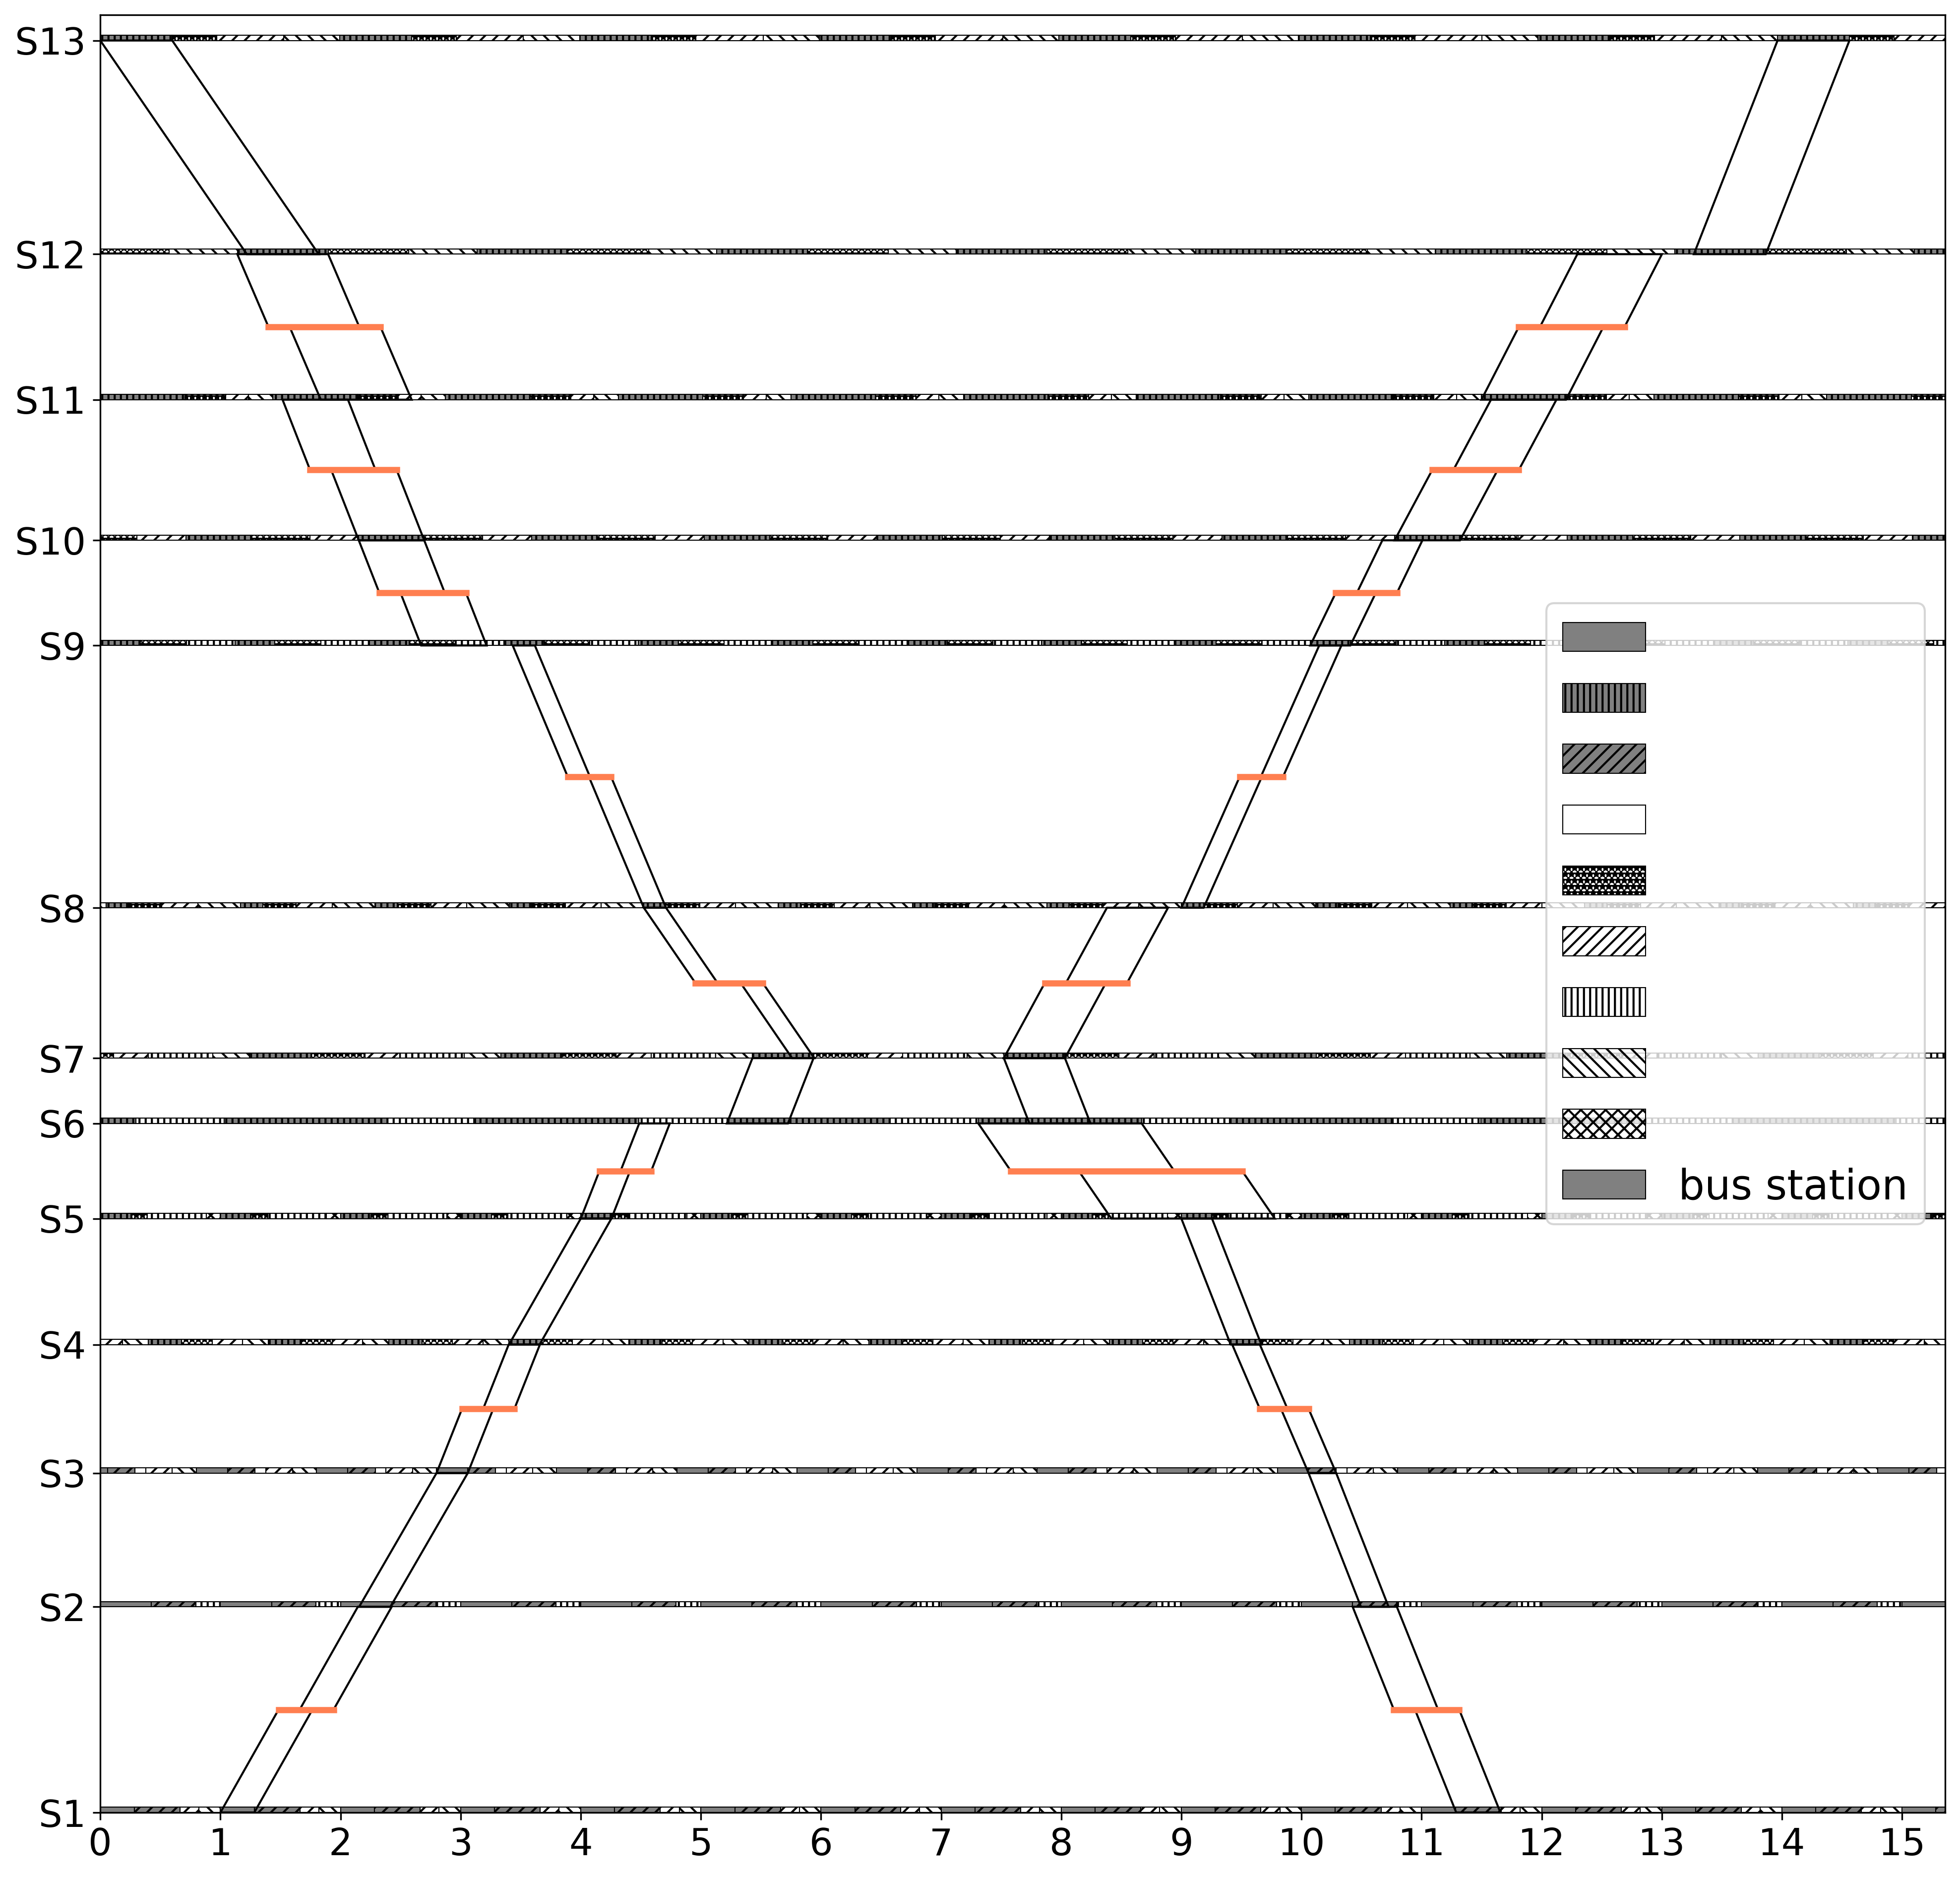

In [9]:
colors=[
            {"color":"gray" , "hatch": None, "fill": True},
            {"color":"gray", "hatch":"||||" , "fill": True},
            {"color": "gray", "hatch":"////" , "fill": True},
            {"color":"white", "hatch": None, "fill": False},
            {"color": "white", "hatch": "****", "fill": False},
            {"color": "white", "hatch": "////", "fill": False},
            {"color": "white", "hatch": "||||", "fill": False},
            {"color": "white", "hatch": "\\\\\\\\", "fill": False},
            {"color": "white", "hatch": "xxxx", "fill": False},
            {"color": "white", "hatch": "....", "fill": False},
        ]
lmb.draw_bus_bound("./公交时距图",colors)

In [10]:
a.to_csv("./a.csv")

In [11]:
from  SimAnalysis import SimAnalysis
df=lmb.get_dataframe()
sim=SimAnalysis(df,phase,ex,os.path.join(os.getcwd(),"..","vissim","aa","zhongsan.inp"),
               os.path.join(os.getcwd(),"..","vissim","aa","vissim.ini"),
               os.path.join(os.getcwd(),"..","vissim","aa","zhongsan - 副本.inp"))
sim.start()
spdx=sim.analysis_speed(os.path.join(os.getcwd(),"..","vissim","aa","zhongsan - 副本.fzp"))
delayx=sim.analysis_delay(os.path.join(os.getcwd(),"..","vissim","aa",'zhongsan - 副本.vlz'))
tvltx=sim.analysis_traveltime(os.path.join(os.getcwd(),"..","vissim","aa",'zhongsan - 副本.rsz'))

M1 3032.2355452400957 977.2800000000001


In [12]:
spdx.to_csv("./sensitivity/spdx/LMband.csv",encoding="utf-8-sig")

In [13]:
i=1
delayx[["delay"+str(i),"stoped"+str(i),"stops"+str(i),"vehicle"+str(i)]]

,delay1,stoped1,stops1,vehicle1
0,0.0,0.0,0.00,0
1,303.8,212.9,11.50,2
2,357.7,230.7,12.77,26
3,393.3,266.1,13.77,13
4,428.2,294.4,14.42,26
5,501.4,343.4,18.23,30
6,424.7,287.0,15.01,97


In [14]:
a=tvltx["traveltime"+str(i)].astype(float)
a[a!=0].mean()

1101.8

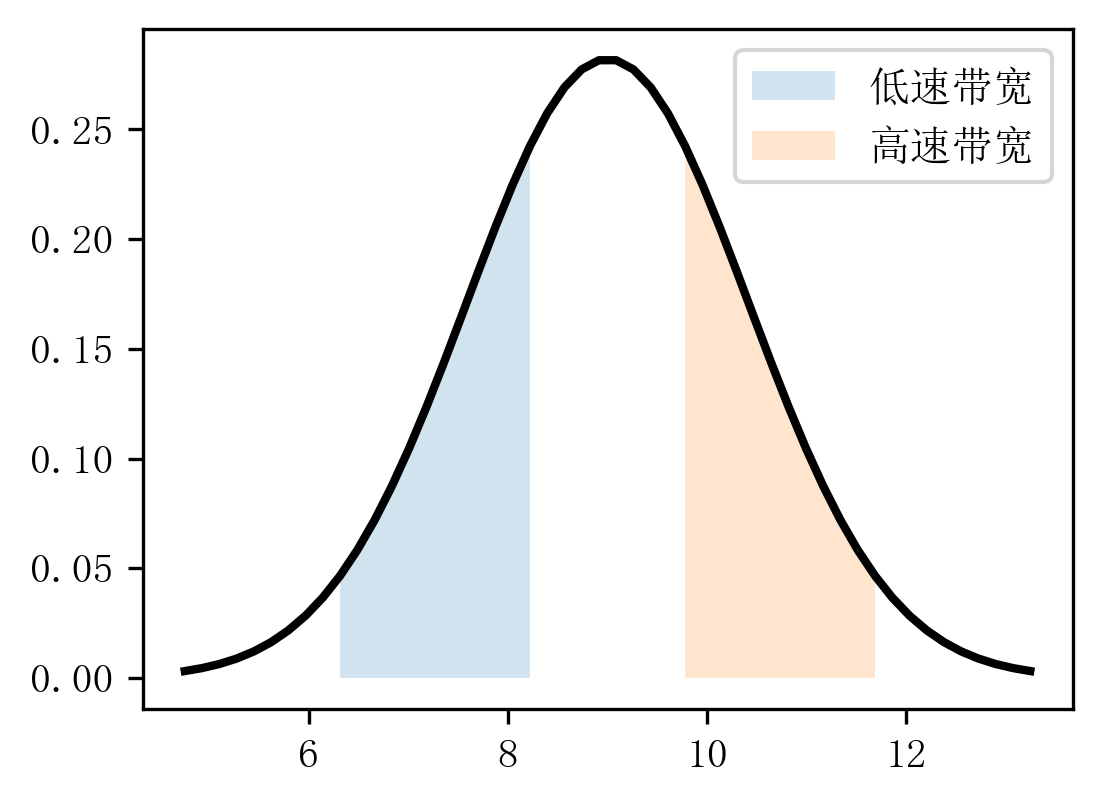

In [15]:
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']="SimSun"
fig = plt.figure(figsize=(4,3), dpi=300)
u = 9   # 均值μ
sig = math.sqrt(2)  # 标准差δ
x = np.linspace(u - 3*sig, u + 3*sig, 50)   # 定义域
y = np.exp(-(x - u) ** 2 / (2 * sig ** 2)) / (math.sqrt(2*math.pi)*sig) # 定义曲线函数
plt.plot(x, y, "black", linewidth=2)    # 加载曲线
l1=plt.fill_between(x, y, 0,where=((x>=u-2*sig)&(x<=u-sig/2)), alpha=0.2)
l2=plt.fill_between(x, y, 0,where=((x<=u+2*sig)&(x>=u+sig/2)), alpha=0.2)
# plt.grid(True)  # 网格线
plt.legend([l1,l2],["低速带宽","高速带宽"])
plt.show()  # 显示
fig.savefig("./正态分布")